In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
import os
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import zipfile
import pandas as pd
import io
from PIL import Image
import matplotlib.pyplot as plt


# **ZIP Folder Access for Dataset**

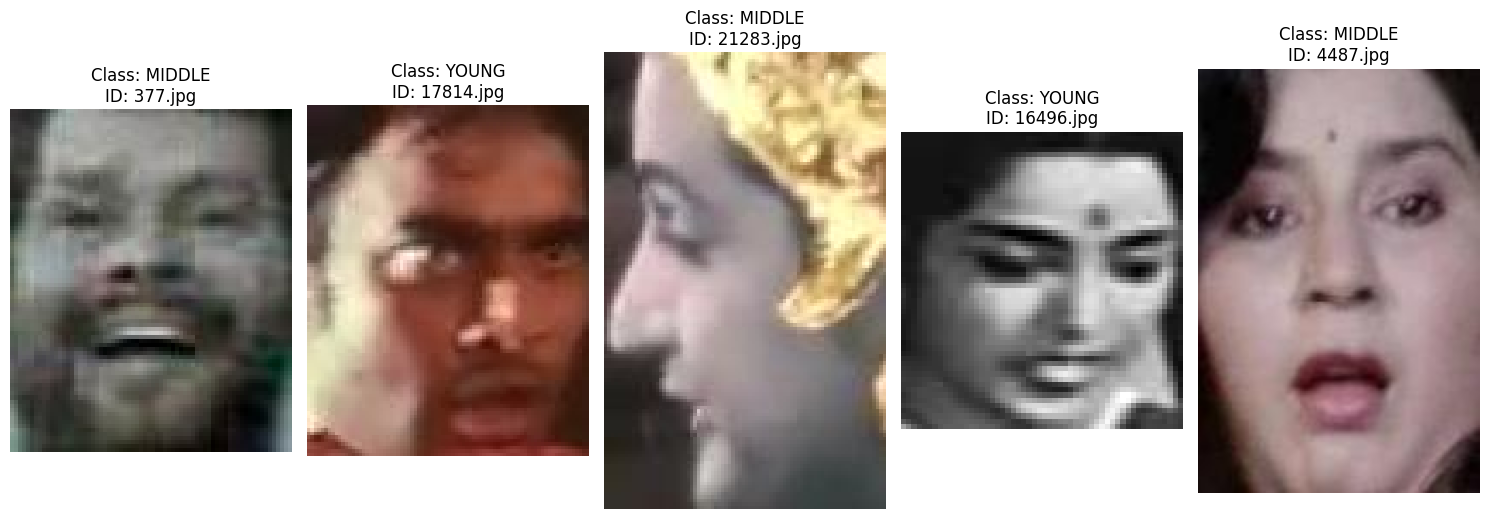

In [3]:
count = 0
zip_file_path = '/content/drive/My Drive/ext_data/image_data.zip'
extracted_folder = '/content/drive/My Drive/ext_data'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

csv_filename = 'train.csv'
csv_file = os.path.join(extracted_folder, csv_filename)

data = pd.read_csv(csv_file)

image_folder = os.path.join(extracted_folder, 'Train')
image_data = []

num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    image_filename = data['ID'][i]
    image_path = os.path.join(image_folder, image_filename)
    image = Image.open(image_path)

    image_class = data['Class'][i]
    image_id = data['ID'][i]

    axes[i].imshow(image)
    axes[i].set_title(f'Class: {image_class}\nID: {image_id}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib as plt
import seaborn as sns
import pandas as pd

<Axes: xlabel='Class', ylabel='count'>

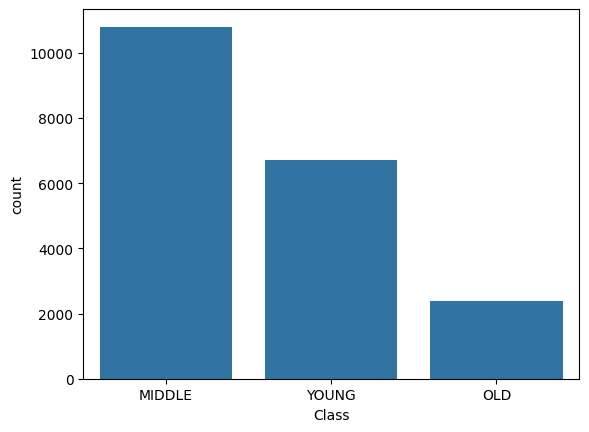

In [ ]:
sns.countplot(x='Class',data=data)


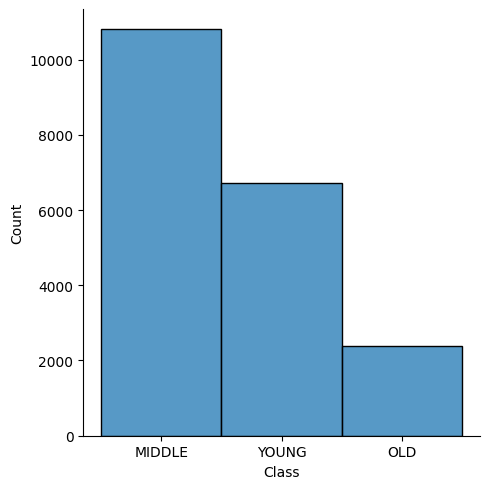

In [ ]:
sns.displot(x='Class',data=data,kde=False)

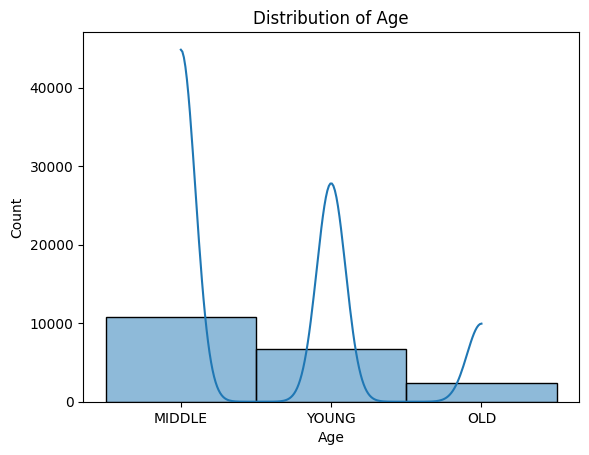

In [ ]:
import matplotlib.pyplot as plt
sns.histplot(data=data, x="Class", bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

In [ ]:
data['Class'].value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [4]:
data['Class'].replace(['YOUNG','MIDDLE','OLD'],[0,1,2],inplace=True)
data.head(5)

,ID,Class
0,377.jpg,1
1,17814.jpg,0
2,21283.jpg,1
3,16496.jpg,0
4,4487.jpg,1


In [ ]:
print(data.shape)

(19906, 2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Augmentation Techniques**

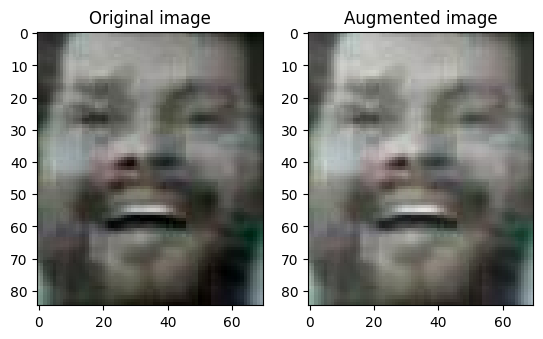

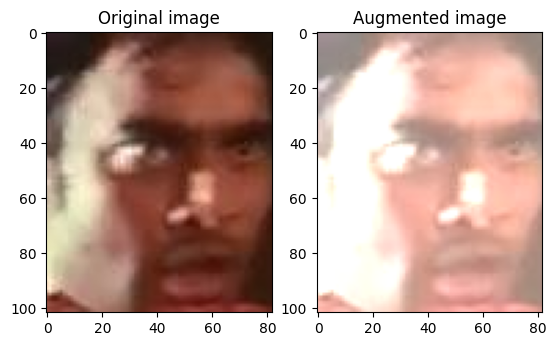

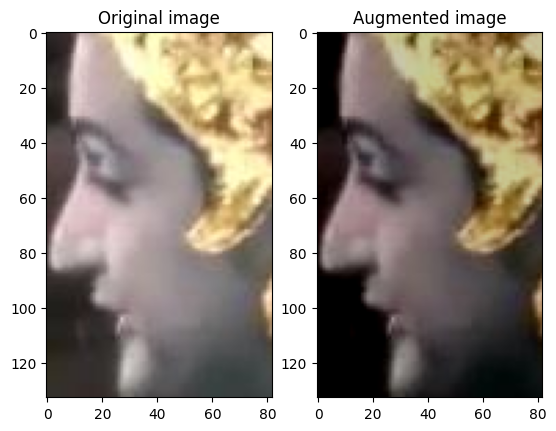

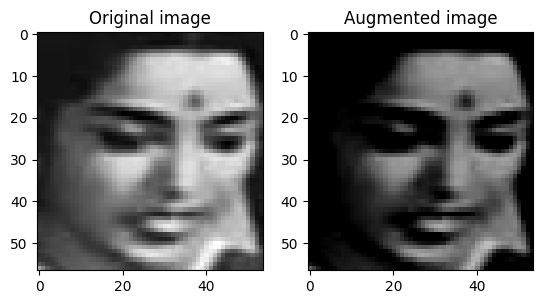

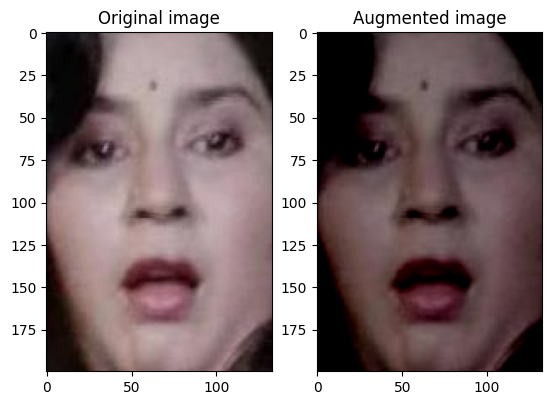

In [ ]:
num_images_to_display = 5


for i in range(num_images_to_display):
    image_filename = data['ID'][i]
    image_path = os.path.join(image_folder, image_filename)
    image = Image.open(image_path)
    rand_brt_image = tf.image.random_brightness(image, max_delta=0.5)
    image_class = data['Class'][i]
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(rand_brt_image)

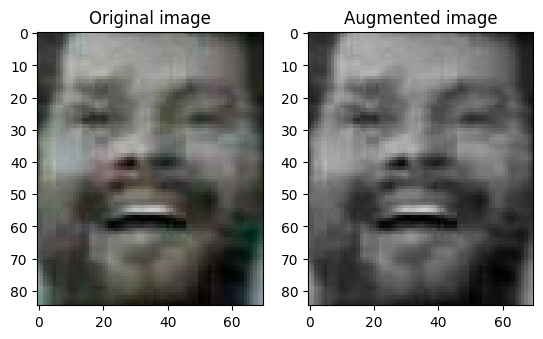

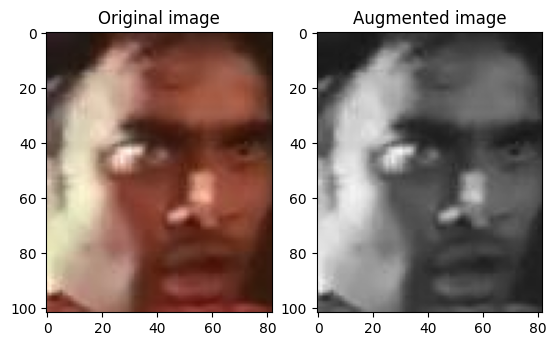

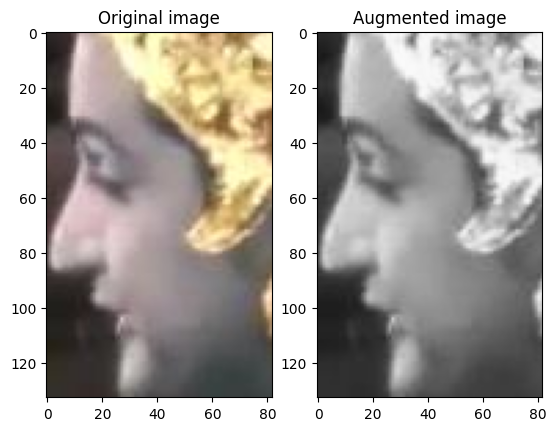

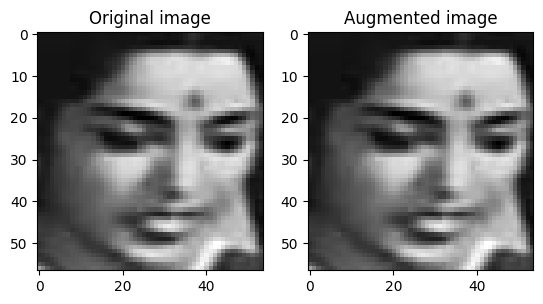

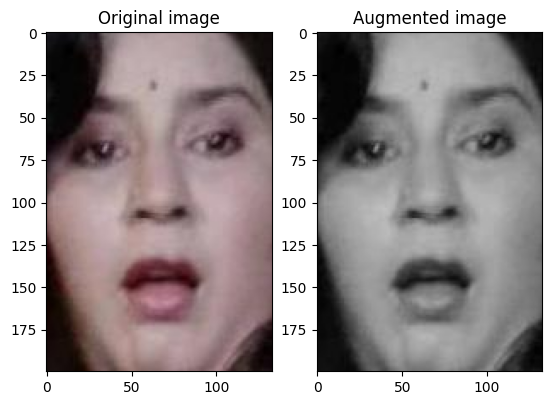

In [ ]:
num_images_to_display = 5

for i in range(num_images_to_display):
    image_filename = data['ID'][i]
    image_path = os.path.join(image_folder, image_filename)
    image = Image.open(image_path)
    imagen = tf.image.rgb_to_grayscale(image)
    grayscaled = tf.image.grayscale_to_rgb(imagen)
    image_class = data['Class'][i]
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(grayscaled)

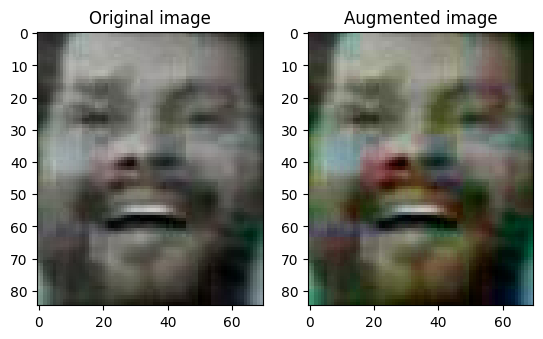

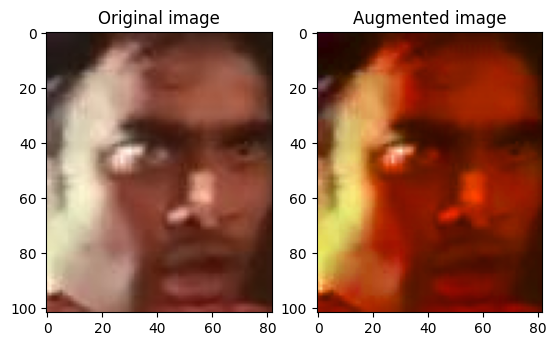

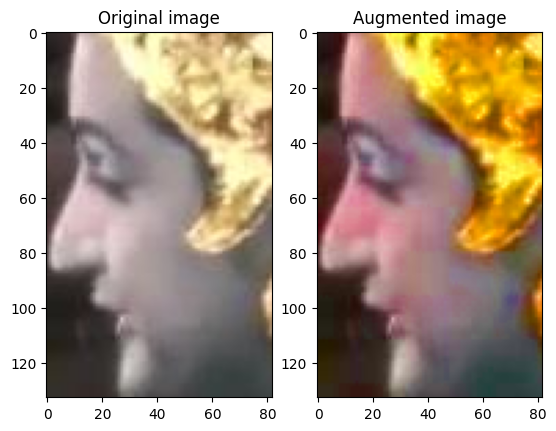

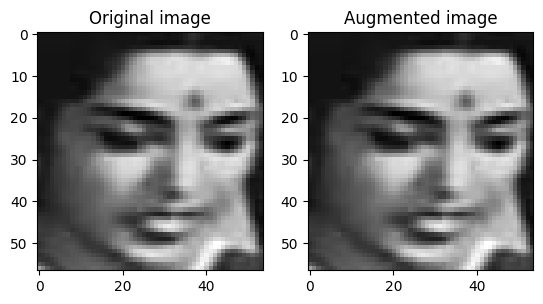

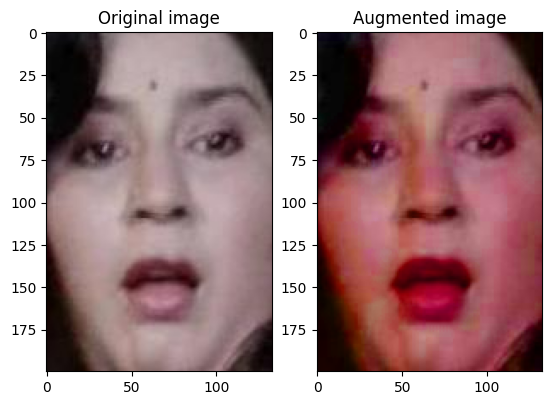

In [ ]:
num_images_to_display = 5

for i in range(num_images_to_display):
    image_filename = data['ID'][i]
    image_path = os.path.join(image_folder, image_filename)
    image = Image.open(image_path)
    adjsat =tf.image.adjust_saturation(image, 3)
    image_class = data['Class'][i]
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(adjsat)

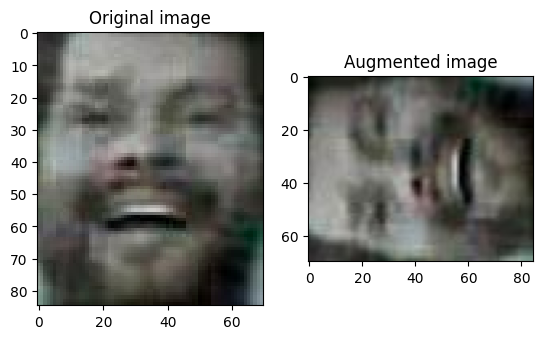

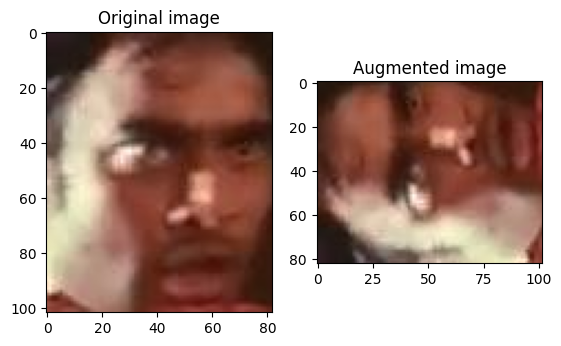

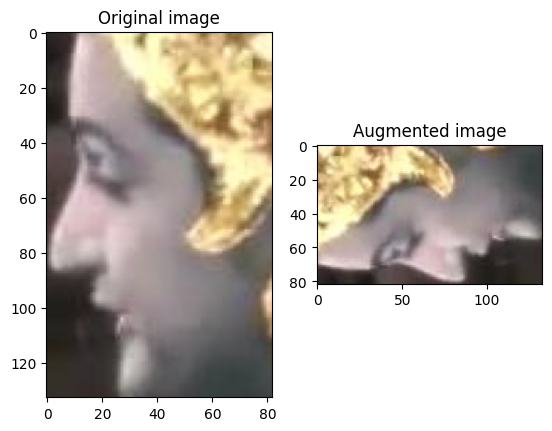

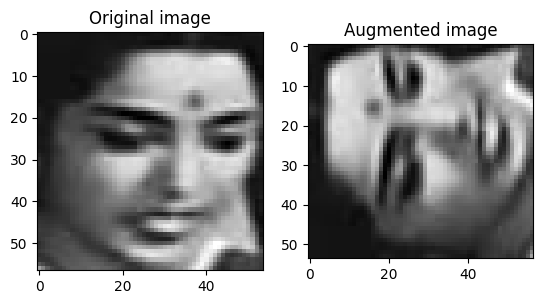

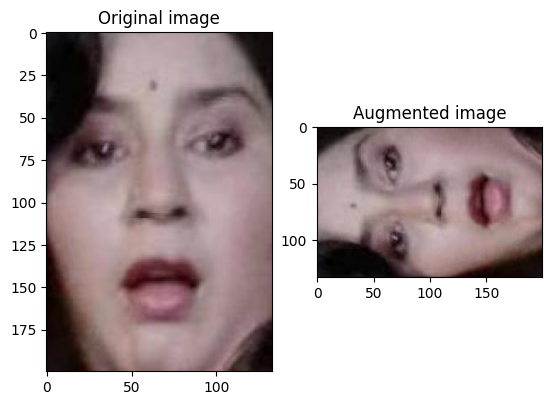

In [ ]:
num_images_to_display = 5

for i in range(num_images_to_display):
    image_filename = data['ID'][i]
    image_path = os.path.join(image_folder, image_filename)
    image = Image.open(image_path)
    rot90 = tf.image.rot90(image)
    image_class = data['Class'][i]
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(rot90)

In [5]:
def read_image(path,ch = 3, resize=(150,150)):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=ch)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.image.resize(image, resize)
    #image = tf.image.rgb_to_grayscale(image)
    #image = tf.image.grayscale_to_rgb(image)
    #image =  tf.image.random_brightness(image, max_delta=0.5)
    #image =tf.image.adjust_saturation(image, 3)
    #image = tf.image.rot90(image)
    return image

In [6]:
def load_data(image_path, label):
    img = read_image(image_path, 3, (150,150))
    return (img, label)

# **Data set Split**

In [7]:
img_data_path = "/content/drive/MyDrive/ext_data/Train"
image_paths = []
for path in os.listdir(img_data_path):
    image_paths.append(img_data_path+"/"+path)
print(len(image_paths))

response_list = []

for i in image_paths:
    _,tail = os.path.split(i)
    response = data.loc[data['ID'] == tail]['Class'].values[0]
    response_list.append(response)
print(len(response_list))

19906
19906


In [8]:
train_data_size = int(0.8*(len(image_paths)))
print(train_data_size)
test_data_size = int(0.2*(len(image_paths)))
print(test_data_size)
train_set = tf.data.Dataset.from_tensor_slices((image_paths[:train_data_size], response_list[:train_data_size]))
test_set = tf.data.Dataset.from_tensor_slices((image_paths[test_data_size:], response_list[test_data_size:]))

15924
3981


In [9]:
train_set = (train_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

In [10]:
test_set = (test_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

## **Model Implementation**

In [11]:
from tensorflow.keras import layers,models

cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])



# **Model Summary**

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# **Model Compile**

In [13]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Model Run with Train and Test Dataset**

In [14]:
history = cnn_model.fit(train_set, epochs=30, validation_data=test_set)

Epoch 1/30
498/498 [==============================] - 342s 676ms/step - loss: 0.8622 - accuracy: 0.6069 - val_loss: 0.7647 - val_accuracy: 0.6710
Epoch 2/30
498/498 [==============================] - 126s 253ms/step - loss: 0.7567 - accuracy: 0.6700 - val_loss: 0.7178 - val_accuracy: 0.7012
Epoch 3/30
498/498 [==============================] - 128s 257ms/step - loss: 0.6999 - accuracy: 0.6964 - val_loss: 0.6545 - val_accuracy: 0.7275
Epoch 4/30
498/498 [==============================] - 130s 261ms/step - loss: 0.6291 - accuracy: 0.7308 - val_loss: 0.6053 - val_accuracy: 0.7484
Epoch 5/30
498/498 [==============================] - 129s 259ms/step - loss: 0.5591 - accuracy: 0.7665 - val_loss: 0.5552 - val_accuracy: 0.7733
Epoch 6/30
498/498 [==============================] - 126s 252ms/step - loss: 0.4858 - accuracy: 0.7967 - val_loss: 0.5319 - val_accuracy: 0.7876
Epoch 7/30
498/498 [==============================] - 132s 266ms/step - loss: 0.4020 - accuracy: 0.8369 - val_loss: 0.4718 -

# **Loss and Accuracy**

In [15]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# **Loss and Accuracy Figure**

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

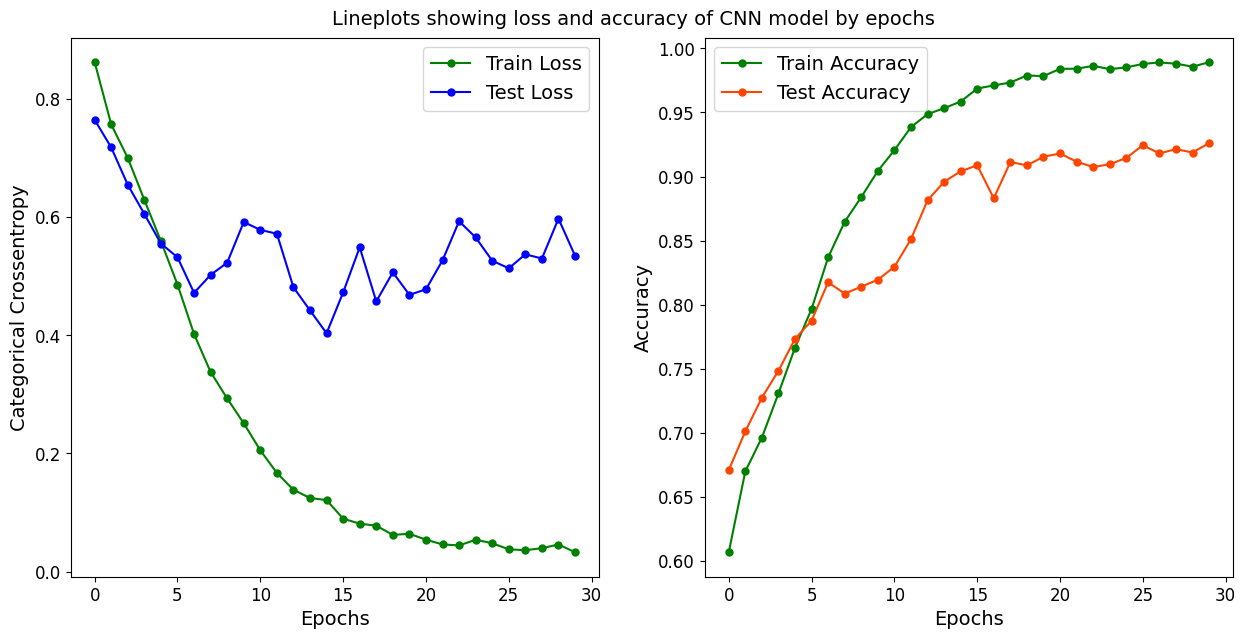

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='green', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'blue', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='green', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=14)

# **Model Evalution**

In [17]:
cnn_model.evaluate(train_set)

498/498 [==============================] - 45s 90ms/step - loss: 0.0429 - accuracy: 0.9861


[0.04289228841662407, 0.98605877161026]

In [18]:
cnn_model.evaluate(test_set)

498/498 [==============================] - 42s 85ms/step - loss: 0.5346 - accuracy: 0.9262


[0.5345955491065979, 0.926153838634491]

# **Prediction from Test set**

In [ ]:
test_pred = cnn_model.predict(test_set)

498/498 [==============================] - 48s 96ms/step


In [ ]:
y_labels = [np.argmax(item) for item in test_pred]
print("Test Predictions response sample:",y_labels[:10])

test_response = response_list[test_data_size:]
print("Test True response sample:", test_response[:10])

Test Predictions response sample: [1, 1, 0, 0, 0, 0, 1, 1, 1, 0]
Test True response sample: [1, 1, 0, 0, 0, 0, 1, 1, 1, 0]


# **Anvil Installation**

In [19]:
pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=7b1794661ee0c73f0825169f66aa11d460383c761d13b40c3587db8b9e409cc1
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


# **Anvil Server Connection**

In [20]:
import anvil.server

anvil.server.connect("server_OYW6M3SXUJZMGQUMIYQMYUDQ-G5TRYF4Y6RGTAAT7")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


# **Classify Function**

In [21]:
import anvil.media
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:

        img = image.load_img(f, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        predictions = cnn_model.predict(img_array)

        score = np.argmax(predictions)
        print("Test Predictions response sample:",score)

        if score == [0]:
            return 'Young'
        elif score == [2]:
            return  'Old'
        else:
            return 'Middle'

